In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from collections import defaultdict
from six.moves import urllib
import simplejson as json
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pmdarima
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# listings_data = pd.read_csv("listings.csv")
# listings_data = listings_data[listings_data.metropolitan != "LA"
calendar_data = pd.read_csv("calendar.csv")
# real_estate_data = pd.read_csv("real_estate.csv")
# demographics_data = pd.read_csv("demographics.csv")
# econ_data = pd.read_csv("econ_state.csv")
# venues_data = pd.read_csv("venues.csv")


In [3]:
calendar_data

,listing_id,date,available,price,metro_area
0,665257,2016-04-22,f,NaN,asheville
1,665257,2016-04-23,f,NaN,asheville
2,665257,2016-04-24,f,NaN,asheville
3,665257,2016-04-25,f,NaN,asheville
4,665257,2016-04-26,f,NaN,asheville
...,...,...,...,...,...
18383950,17383627,2017-05-07,f,NaN,LA
18383951,17383627,2017-05-06,f,NaN,LA
18383952,17383627,2017-05-05,f,NaN,LA
18383953,17383627,2017-05-04,f,NaN,LA


In [4]:
calendar_data = calendar_data[calendar_data.metro_area != ("LA","sheville")]
calendar_data ['price'] = calendar_data['price'].replace({'\$':''}, regex = True)
calendar_data ['price'] = calendar_data['price'].replace({',':''}, regex = True)
calendar_data ['price'] = calendar_data['price'].astype(float)

calendar_data = calendar_data.fillna(method="bfill")
calendar_data = calendar_data.drop(['available','listing_id'], axis=1)

df = calendar_data.groupby(["date"],as_index=False).mean("price")
df.date = pd.to_datetime(df.date)

# df = df.resample('M', on='date').mean()




In [5]:
df

,date,price
0,2016-04-20,112.142857
1,2016-04-21,121.012626
2,2016-04-22,125.300955
3,2016-04-23,126.435294
4,2016-04-24,123.348380
...,...,...
768,2018-05-28,205.827209
769,2018-05-29,205.361786
770,2018-05-30,205.271905
771,2018-05-31,208.433578


In [6]:
df = df.set_index('date')


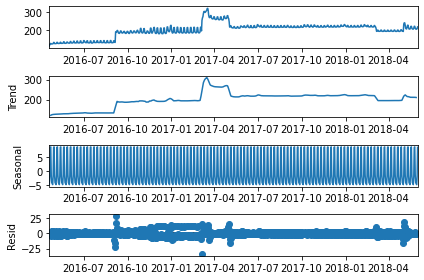

In [7]:
df
result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

In [8]:
# # real_estate_data[real_estate_data.metro == "Austin"]
# real_estate_data = real_estate_data[real_estate_data.metro == "Nashville"]
# zhvi = real_estate_data[real_estate_data.type == "ZHVI"]
# zri  = real_estate_data[real_estate_data.type == "ZRI"]

# zri  = zri.mean()
# zhvi = zhvi.mean()

# zri = pd.Series(zri[3:], name='ZRI')
# zhvi = pd.Series(zhvi[3:], name='ZHVI')
# df_zillow = pd.merge(zri,zhvi,right_index = True,
#                left_index = True)
# df_zillow.index = pd.to_datetime(df_zillow.index)

# house_data = pd.concat([df_zillow,df['price']],axis = 1)


NameError: name 'real_estate_data' is not defined

In [10]:
# plt.title("Scatter Plot of Zillow Rental and Housing Value Index")
# plt.scatter(zri, zhvi, s=10, c='b', marker="s")


In [12]:
# df_zillow = pd.merge(zri,zhvi/100,right_index = True,
#                left_index = True)
# df_zillow.index = pd.to_datetime(df_zillow.index)

# df_zillow.plot()

<AxesSubplot:xlabel='date'>

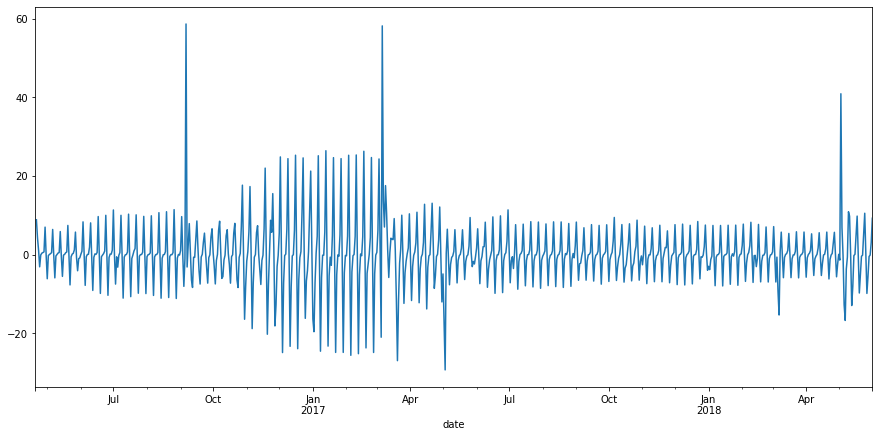

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['price first diffrence'] = df['price'] - df['price'].shift(1)
df['price seasonal first difference']=df['price']-df['price'].shift(365)
df['price first diffrence'].plot()


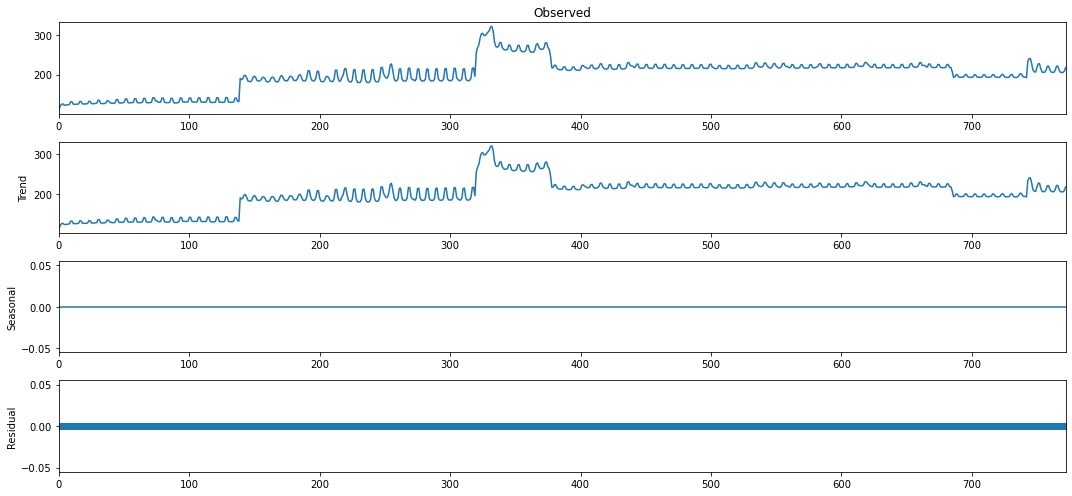

In [14]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['price'].values, model='additive', period=1)
result.plot()
pyplot.show()

In [15]:
df

,price,price first diffrence,price seasonal first difference
date,,,
2016-04-20,112.142857,NaN,NaN
2016-04-21,121.012626,8.869769,NaN
2016-04-22,125.300955,4.288329,NaN
2016-04-23,126.435294,1.134339,NaN
2016-04-24,123.348380,-3.086914,NaN
...,...,...,...
2018-05-28,205.827209,-5.542868,-14.098689
2018-05-29,205.361786,-0.465423,-12.851581
2018-05-30,205.271905,-0.089881,-10.575955


In [16]:
## test the stationary of price

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [17]:
## to see the time series is staionary or not
adfuller_test(df['price'])

ADF Test Statistic : -2.320508877719151
p-value : 0.16543873626521194
#Lags Used : 21
Number of Observations : 751
weak evidence against null hypothesis,indicating it is non-stationary 


In [18]:
df['price first diffrence'] = df['price'] - df['price'].shift(1)
df['Price Seasonal First Difference']=df['price']-df['price'].shift(365)
df.head()


,price,price first diffrence,price seasonal first difference,Price Seasonal First Difference
date,,,,
2016-04-20,112.142857,NaN,NaN,NaN
2016-04-21,121.012626,8.869769,NaN,NaN
2016-04-22,125.300955,4.288329,NaN,NaN
2016-04-23,126.435294,1.134339,NaN,NaN
2016-04-24,123.348380,-3.086914,NaN,NaN


In [19]:
# Again testing if data is stationary
adfuller_test(df['Price Seasonal First Difference'].dropna())

ADF Test Statistic : -1.5347008439517442
p-value : 0.5162808609149775
#Lags Used : 16
Number of Observations : 391
weak evidence against null hypothesis,indicating it is non-stationary 


<AxesSubplot:xlabel='date'>

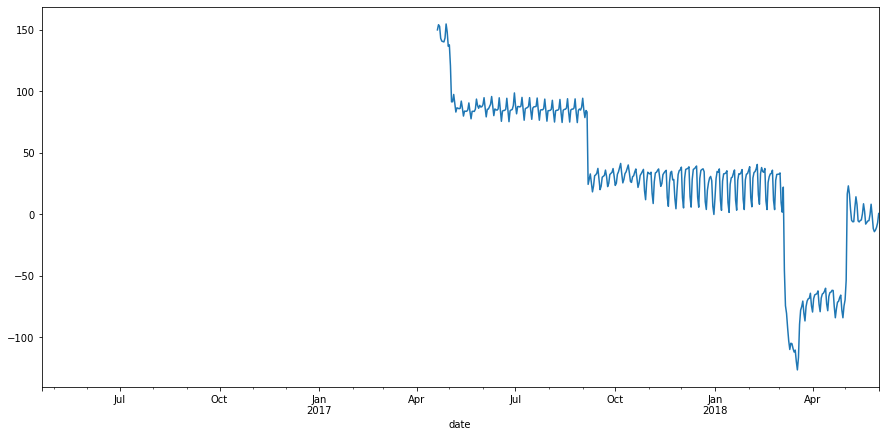

In [20]:
df['Price Seasonal First Difference'].plot()

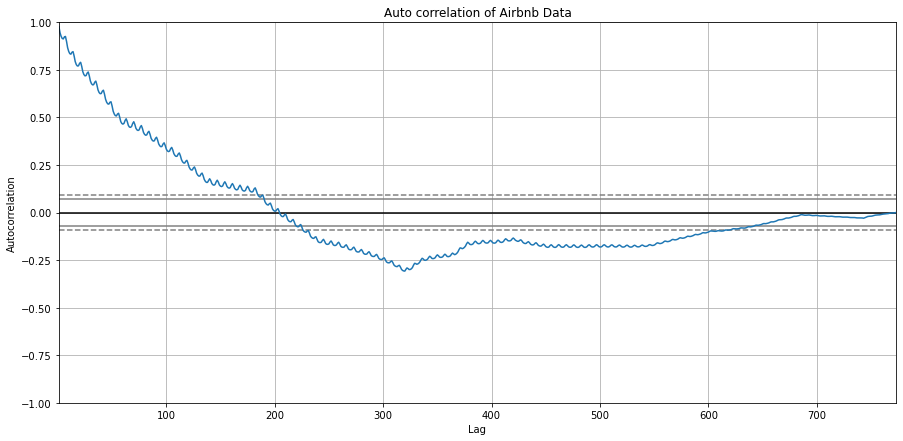

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['price'])
plt.title('Auto correlation of Airbnb Data')
plt.show()

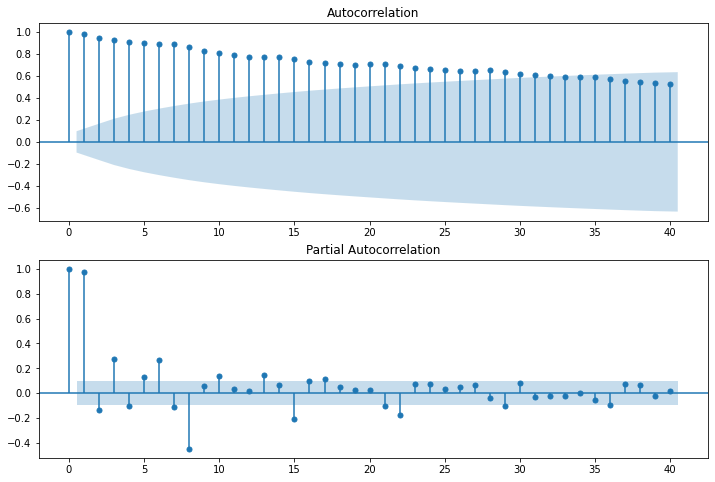

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['price'],order=(4,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/xingzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/xingzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  772
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2534.802
Method:                       css-mle   S.D. of innovations              6.448
Date:                Sun, 18 Jul 2021   AIC                           5083.603
Time:                        14:00:55   BIC                           5116.146
Sample:                    04-21-2016   HQIC                          5096.126
                         - 06-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1237      0.134      0.925      0.355      -0.138       0.386
ar.L1.D.price     0.5329      0.051     10.550      0.000       0.434       0.632
ar.L2.D.price    -0.5883      0.039    -15.101      0.000      -0.665      -0.512
ar.L3.D.price     0.1940      0.040      4.866      0.000       0.116       0.272
ar.L4.D.price    -0.3803      0.034    -11.330      0.000      -0.446      -0.314
ma.L1.D.price    -0.2862      0.045     -6.352      0.000      -0.374      -0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7963           -0.8885j            1.1931           -0.1337
AR.2            0.7963           +0.8885j            1.1931            0.1337
AR.3           -0.5412           -1.2468j            1.3592           -0.3152
AR.4           -0.5412           +1.2468j            1.3592            0.3152
MA.1            3.4944           +0.0000j            3.4944            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
# dfm['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
# dfm[['price','forecast']].plot(figsize=(12,8))

/Users/xingzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/xingzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:title={'center':'SARIMAX Predication for Airbnb Rental Data'}, xlabel='date'>

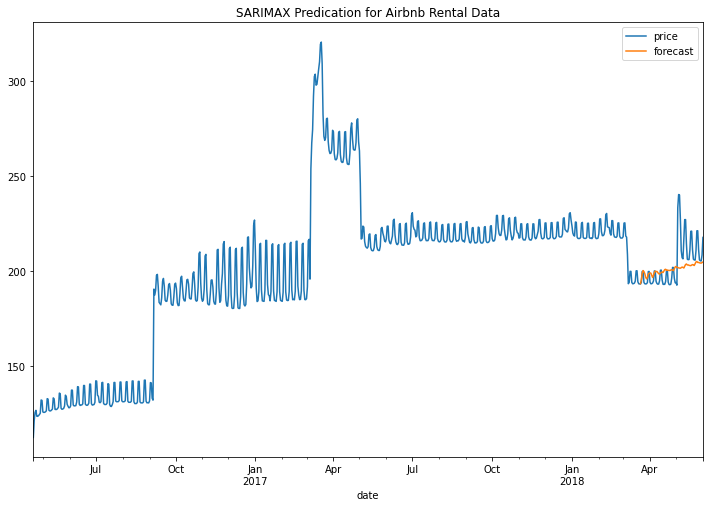

In [25]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['price'],order=(5, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=700,end=772,dynamic=True)
df[['price','forecast']].plot(figsize=(12,8), title = 'SARIMAX Predication for Airbnb Rental Data')

<AxesSubplot:title={'center':'Prediction of Futuree 100 days Airbnb Rental Price'}>

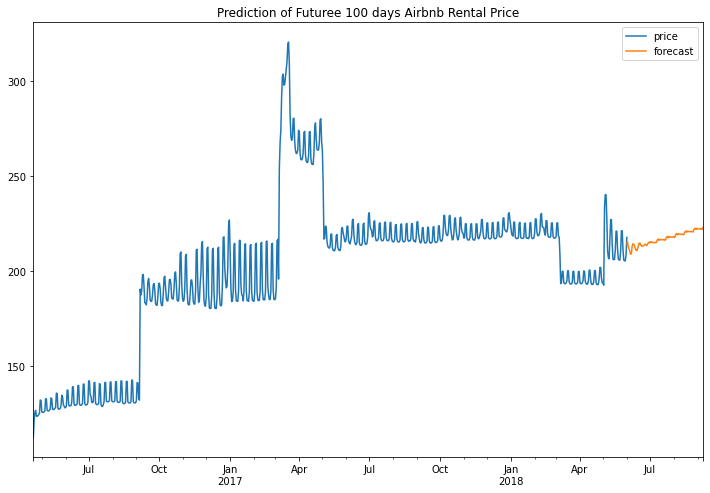

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0, 100)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 772, end = 1000, dynamic= True)
future_df[['price', 'forecast']].plot(figsize=(12, 8), title = 'Prediction of Futuree 100 days Airbnb Rental Price')